# CIFAR - 10
## Basic CNN

### Activate virtual environment

In [9]:
%%bash
source ~/kerai/bin/activate

### Imports

In [25]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

Import helper functions

In [11]:
from helper import get_class_names, get_train_data, get_test_data, plot_images, plot_model

Change matplotlib graph style

In [12]:
matplotlib.style.use('ggplot')

### Constants

Import class names

In [13]:
class_names = get_class_names()
print(class_names)

Decoding file: data/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Get number of classes

In [14]:
num_classes = len(class_names)
print(num_classes)

10


### Fetch and decode data

Load the training dataset. Labels are integers whereas class is one-hot encoded vectors.

In [15]:
images_train, labels_train, class_train = get_train_data()

Decoding file: data/data_batch_1
Decoding file: data/data_batch_2
Decoding file: data/data_batch_3
Decoding file: data/data_batch_4
Decoding file: data/data_batch_5


Normal labels

In [16]:
print(labels_train)

[6 9 9 ..., 9 1 1]


One hot encoded labels

In [17]:
print(class_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


Load the testing dataset.

In [18]:
images_test, labels_test, class_test = get_test_data()

Decoding file: data/test_batch


In [19]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


The CIFAR-10 dataset has been loaded and consists of a total of 60,000 images and corresponding labels.

### Define the CNN model

In [49]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512), activation='relu')
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes), activation='softmax')
    
    model.summary()
    
    return model

Build model

In [27]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
__________

### Train model on the training data

Save the model after every epoch

In [28]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor 

Configure the model for training

In [29]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

For more information on categorical cross entropy loss function see - https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

Fit the model on the data provided

In [40]:
model_details = model.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 100, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 86s - loss: 0.8135 - acc: 0.7140 - val_loss: 0.7845 - val_acc: 0.7277
Epoch 2/100
50000/50000 [==============================] - 87s - loss: 0.7988 - acc: 0.7227 - val_loss: 0.7690 - val_acc: 0.7330
Epoch 3/100
50000/50000 [==============================] - 87s - loss: 0.7841 - acc: 0.7257 - val_loss: 0.7830 - val_acc: 0.7260
Epoch 4/100
50000/50000 [==============================] - 84s - loss: 0.7692 - acc: 0.7317 - val_loss: 0.7615 - val_acc: 0.7324
Epoch 5/100
50000/50000 [==============================] - 87s - loss: 0.7577 - acc: 0.7356 - val_loss: 0.7484 - val_acc: 0.7428
Epoch 6/100
50000/50000 [==============================] - 87s - loss: 0.7423 - acc: 0.7403 - val_loss: 0.7433 - val_acc: 0.7427
Epoch 7/100
50000/50000 [==============================] - 92s - loss: 0.7325 - acc: 0.7446 - val_loss: 0.7366 - val_acc: 0.7453
Epoch 8/100
50000/50000 [======================

KeyboardInterrupt: 

### Evaluate the model

In [41]:
scores = model.evaluate(images_test, class_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.11%


### Model accuracy and loss plots

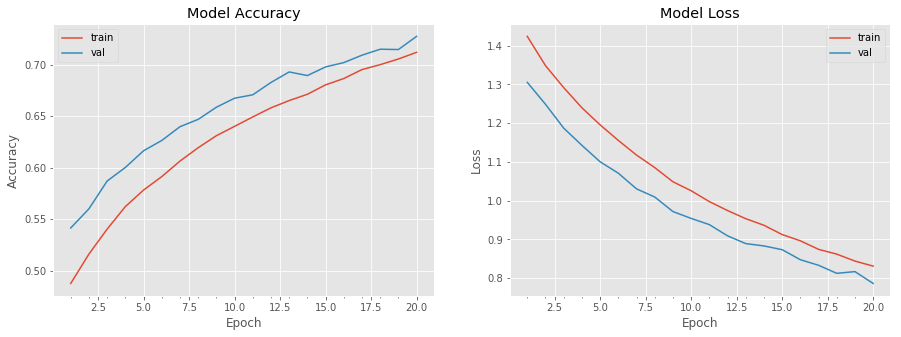

In [42]:
plot_model(model_details)

### Predictions

Predict class for test set images

In [43]:
class_pred = model.predict(images_test, batch_size=32)
print(class_pred[0])

[  3.00252053e-04   6.40491303e-03   3.13157006e-03   6.46596372e-01
   5.60190645e-04   2.91760772e-01   4.59656231e-02   5.50809491e-04
   4.47317911e-03   2.56397761e-04]


Get the index of the largest element in each vector

In [44]:
labels_pred = np.argmax(class_pred,axis=1)
print(labels_pred)

[3 8 8 ..., 5 4 7]


Check which labels have been predicted correctly

In [45]:
correct = (labels_pred == labels_test)
print(correct)
print("Number of correct predictions: %d" % sum(correct))

[ True  True  True ...,  True False  True]
Number of correct predictions: 7811


Calculate accuracy using manual calculation

In [46]:
num_images = len(correct)
print("Accuracy: %.2f%%" % ((sum(correct)*100)/num_images))

Accuracy: 78.11%


### Show some mis-classifications

Get the incorrectly classified images

In [47]:
incorrect = (correct == False)

# Images of the test-set that have been incorrectly classified.
images_error = images_test[incorrect]

# Get predicted classes for those images
labels_error = labels_pred[incorrect]

# Get true classes for those images
labels_true = labels_test[incorrect]

Plot the first 9 mis-classified images

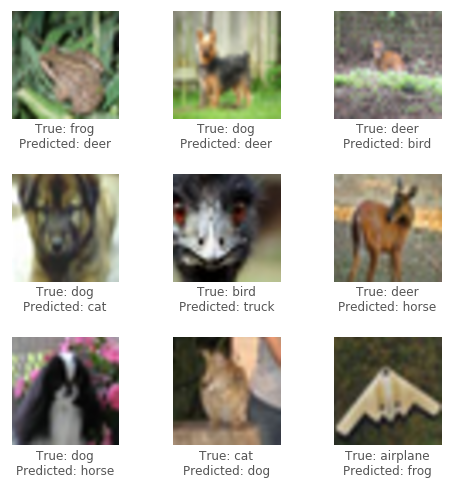

In [48]:
plot_images(images=images_error[0:9],
            labels_true=labels_true[0:9],
            class_names=class_names,
            labels_pred=labels_error[0:9])

## Credits

 - https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
 - https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/06_CIFAR-10.ipynb
 - http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
 - https://parneetk.github.io/blog/cnn-cifar10/
 - https://github.com/dnlcrl/deep-residual-networks-pyfunt/blob/master/docs/CIFAR-10%20Experiments.ipynb